# Ejercicios de grafos. Del .mat file de coativation_matrix, realizar los siguientes ejercicios:

1. Crear un dataframe con la información del ndarray de coativation_matrix, las columnas deben ser números desde el 1, los índices deben ser iguales a las columnas
2. Mostrar el heatmap de coativation_matrix
3. Crear un dataframe subconjunto del dataframe anterior que contenga de la fila 10 a la 30 y de la columna 10 a la 30
4. Mostrar el heatmap del nuevo dataframe
5. Crear el grafo dirigido del nuevo dataframe
6. ¿qué nodo tiene más conexiones del nuevo dataset?
7. Del dataframe con el array de coactivation_matrix, calcular los quantiles 0.25, 0.5, 0.75 de los valores de los datos (quantiles de las conexiones)
8. Mostrar el histograma de distribución de valores de la matriz de coactivación
9. Filtre el dataframe usando como threshold que los valores sean mayor a 0, cómo queda la matriz de activación filtrada?



In [51]:
import networkx as nx
import scipy.io # paquete enfocado a funciones estadísticas.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
path = r"C:\Users\daphn\Documents\UNAM\Neurociencias\Quinto semestre 1\Modelos\Git\Neurociencias-2025-1\BCT\BCT\2019_03_03_BCT\data_and_demos\Coactivation_matrix.mat"
coactivation_matrix_json = scipy.io.loadmat(path)
coactivation_matrix_json

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNX86, Created on: Wed Dec 25 01:14:03 2013',
 '__version__': '1.0',
 '__globals__': [],
 'Coactivation_matrix': array([[0.        , 0.16071429, 0.11148649, ..., 0.        , 0.05045872,
         0.1011236 ],
        [0.16071429, 0.        , 0.06825939, ..., 0.        , 0.        ,
         0.06923077],
        [0.11148649, 0.06825939, 0.        , ..., 0.03412969, 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.03412969, ..., 0.        , 0.        ,
         0.        ],
        [0.05045872, 0.        , 0.        , ..., 0.        , 0.        ,
         0.09777778],
        [0.1011236 , 0.06923077, 0.        , ..., 0.        , 0.09777778,
         0.        ]]),
 'Coord': array([[ 7.24363636, 37.01090909,  9.42545455],
        [ 7.98653199, 46.22222222, 15.60942761],
        [ 7.55725191, 33.83206107, 23.51145038],
        ...,
        [-4.92385787, 15.31979695, 27.73604061],
        [-6.27312775, 34.70484

In [52]:
coactivation_matrix_json.keys()

dict_keys(['__header__', '__version__', '__globals__', 'Coactivation_matrix', 'Coord'])

In [53]:
coactivation_matrix = coactivation_matrix_json['Coactivation_matrix']
Coord = coactivation_matrix_json['Coord']

In [54]:
n_columns = coactivation_matrix.shape[1]
labels = list(range(1, n_columns + 1))
df = pd.DataFrame(coactivation_matrix, columns=labels, index=labels)
df

,1,2,3,4,5,6,7,8,9,10,...,629,630,631,632,633,634,635,636,637,638
1,0.000000,0.160714,0.111486,0.000000,0.138095,0.00000,0.000000,0.000000,0.0,0.034351,...,0.0,0.000000,0.0,0.0,0.157676,0.053872,0.049383,0.000000,0.050459,0.101124
2,0.160714,0.000000,0.068259,0.000000,0.042056,0.00000,0.000000,0.000000,0.0,0.036585,...,0.0,0.000000,0.0,0.0,0.119149,0.042105,0.000000,0.000000,0.000000,0.069231
3,0.111486,0.068259,0.000000,0.224199,0.000000,0.00000,0.000000,0.052846,0.0,0.000000,...,0.0,0.047035,0.0,0.0,0.000000,0.161905,0.103943,0.034130,0.000000,0.000000
4,0.000000,0.000000,0.224199,0.000000,0.000000,0.00000,0.039275,0.048035,0.0,0.000000,...,0.0,0.048673,0.0,0.0,0.000000,0.000000,0.075697,0.108787,0.000000,0.000000
5,0.138095,0.042056,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.000000,...,0.0,0.000000,0.0,0.0,0.066079,0.000000,0.000000,0.000000,0.103448,0.053279
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,0.053872,0.042105,0.161905,0.000000,0.000000,0.00000,0.000000,0.072650,0.0,0.051195,...,0.0,0.046414,0.0,0.0,0.078498,0.000000,0.196721,0.091255,0.000000,0.000000
635,0.049383,0.000000,0.103943,0.075697,0.000000,0.03876,0.000000,0.000000,0.0,0.000000,...,0.0,0.033019,0.0,0.0,0.057377,0.196721,0.000000,0.111650,0.000000,0.000000
636,0.000000,0.000000,0.034130,0.108787,0.000000,0.00000,0.105839,0.083951,0.0,0.000000,...,0.0,0.053528,0.0,0.0,0.000000,0.091255,0.111650,0.000000,0.000000,0.000000
637,0.050459,0.000000,0.000000,0.000000,0.103448,0.00000,0.000000,0.000000,0.0,0.046729,...,0.0,0.000000,0.0,0.0,0.059361,0.000000,0.000000,0.000000,0.000000,0.097778


Text(0.5, 1.0, 'Mapa de calor de coactivation_matrix')

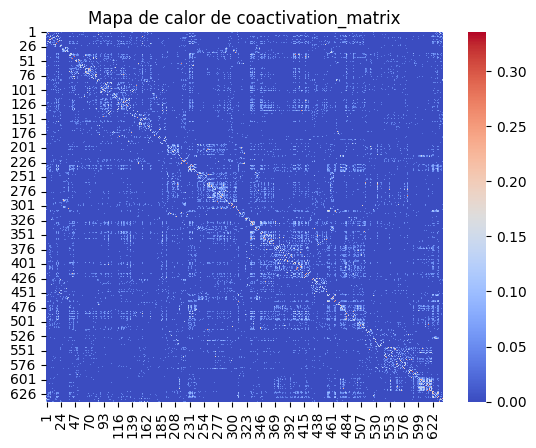

In [55]:
sns.heatmap(df, cmap='coolwarm')
plt.title("Mapa de calor de coactivation_matrix")

In [67]:
df_subconjunto = df.iloc[9:30, 9:30]
df_subconjunto

,10,11,12,13,14,15,16,17,18,19,...,21,22,23,24,25,26,27,28,29,30
10,0.000000,0.054299,0.145251,0.000000,0.103286,0.000000,0.000000,0.000000,0.068627,0.000000,...,0.000000,0.000000,0.044715,0.252381,0.000000,0.040650,0.000000,0.00000,0.000000,0.000000
11,0.054299,0.000000,0.075000,0.035556,0.000000,0.000000,0.140940,0.000000,0.107784,0.046414,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
12,0.145251,0.075000,0.000000,0.000000,0.000000,0.053435,0.059701,0.000000,0.000000,0.032864,...,0.000000,0.094488,0.000000,0.000000,0.000000,0.037234,0.000000,0.00000,0.000000,0.000000
13,0.000000,0.035556,0.000000,0.000000,0.000000,0.000000,0.000000,0.036697,0.033175,0.170833,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
14,0.103286,0.000000,0.000000,0.000000,0.000000,0.043478,0.055215,0.034398,0.087209,0.037344,...,0.000000,0.090323,0.000000,0.000000,0.046632,0.000000,0.000000,0.00000,0.000000,0.000000
15,0.000000,0.000000,0.053435,0.000000,0.043478,0.000000,0.000000,0.000000,0.034247,0.000000,...,0.000000,0.166667,0.038251,0.071038,0.099338,0.000000,0.000000,0.00000,0.000000,0.000000
16,0.000000,0.140940,0.059701,0.000000,0.055215,0.000000,0.000000,0.000000,0.115108,0.000000,...,0.000000,0.141667,0.000000,0.036269,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
17,0.000000,0.000000,0.000000,0.036697,0.034398,0.000000,0.000000,0.000000,0.030612,0.042411,...,0.136674,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
18,0.068627,0.107784,0.000000,0.033175,0.087209,0.034247,0.115108,0.030612,0.000000,0.099057,...,0.000000,0.000000,0.000000,0.038647,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
19,0.000000,0.046414,0.032864,0.170833,0.037344,0.000000,0.000000,0.042411,0.099057,0.000000,...,0.150877,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


Text(0.5, 1.0, 'Mapa de calor de subconjunto')

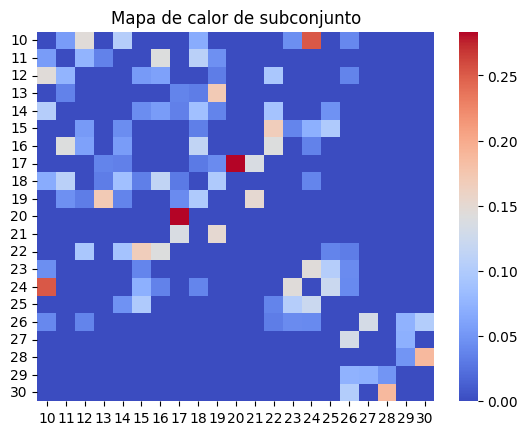

In [68]:
sns.heatmap(df_subconjunto, cmap='coolwarm')
plt.title("Mapa de calor de subconjunto")

Text(0.5, 1.0, 'Grafo dirigido del subconjunto')

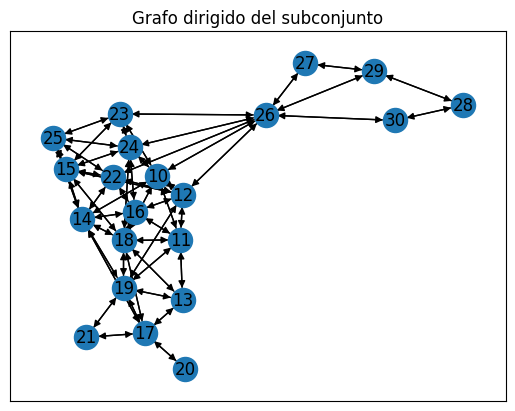

In [78]:
G = nx.from_pandas_adjacency(df_subconjunto, create_using=nx.DiGraph)
nx.draw_networkx(G, arrows=True, arrowstyle='-|>')
plt.title("Grafo dirigido del subconjunto")
# El nodo 18 es el que tiene más conexiones (5)

In [79]:
# Cálculo del nodo con más conexiones
node_degrees = G.degree()  # Obtiene el grado total de todos los nodos
max_degree_node = max(node_degrees, key=lambda x: x[1]) # Encontrar el nodo con el mayor grado (nodo
max_degree_node

(18, 18)

In [71]:
q1 = df.quantile(0.25)
q1

1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
634    0.0
635    0.0
636    0.0
637    0.0
638    0.0
Name: 0.25, Length: 638, dtype: float64

In [72]:
q2 = df.quantile(0.5)
q2

1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
634    0.0
635    0.0
636    0.0
637    0.0
638    0.0
Name: 0.5, Length: 638, dtype: float64

In [73]:
q3 = df.quantile(0.75)
q3

1      0.0
2      0.0
3      0.0
4      0.0
5      0.0
      ... 
634    0.0
635    0.0
636    0.0
637    0.0
638    0.0
Name: 0.75, Length: 638, dtype: float64

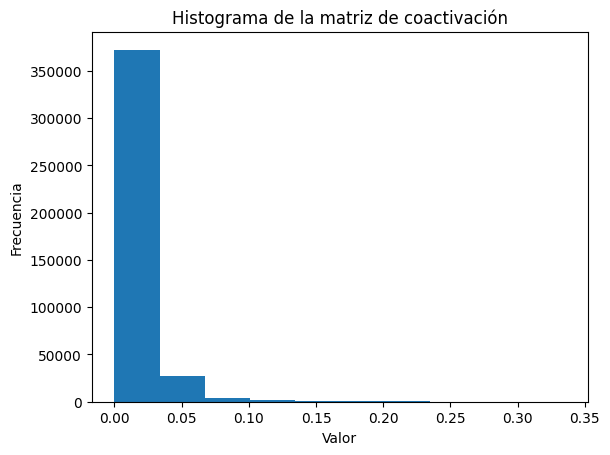

In [84]:
plano = df.values.flatten()
plt.hist(plano)
plt.title('Histograma de la matriz de coactivación')
plt.xlabel('Valor')
plt.ylabel('Frecuencia')
plt.show()

In [86]:
matriz_binaria = (df > 0).astype(int)
matriz_binaria

,1,2,3,4,5,6,7,8,9,10,...,629,630,631,632,633,634,635,636,637,638
1,0,1,1,0,1,0,0,0,0,1,...,0,0,0,0,1,1,1,0,1,1
2,1,0,1,0,1,0,0,0,0,1,...,0,0,0,0,1,1,0,0,0,1
3,1,1,0,1,0,0,0,1,0,0,...,0,1,0,0,0,1,1,1,0,0
4,0,0,1,0,0,0,1,1,0,0,...,0,1,0,0,0,0,1,1,0,0
5,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
634,1,1,1,0,0,0,0,1,0,1,...,0,1,0,0,1,0,1,1,0,0
635,1,0,1,1,0,1,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0
636,0,0,1,1,0,0,1,1,0,0,...,0,1,0,0,0,1,1,0,0,0
637,1,0,0,0,1,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
